# 2487 Machine Learning Assignment 4
#Inside Out
![](https://upload.wikimedia.org/wikipedia/en/0/0a/Inside_Out_%282015_film%29_poster.jpg)




Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise.

Your task is to use deep learning techniques to classify the Tweets into the corresponding emotions:

In [1]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
from datasets import load_dataset
import tensorflow as tf

In [3]:
emotion = load_dataset("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Data Fields

The data fields are:

- text: a string feature.
- label: a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4), surprise (5).

In [16]:
emotion['train'][0]['text'],emotion['train'][0]['label'],emotion['train'].features

('i didnt feel humiliated',
 0,
 {'text': Value(dtype='string', id=None),
  'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)})

In [ ]:
emotion['validation'][0]['text'],emotion['validation'][0]['label']

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
emotion['test'][0]['text'],emotion['test'][0]['label']

('im feeling rather rotten so im not very ambitious right now', 0)

split: with a total of 20_000 examples split into train, validation and split

In [ ]:
emotion['train'].shape, emotion['validation'].shape, emotion['test'].shape

((16000, 2), (2000, 2), (2000, 2))

## Question 1 (40 points)
Check the distribution of the text length in the data, build the simple RNN model and LSTM model with one layer, and two stacked layers, respectively and compare their performance. You may choose to pad or truncate the input sequence to be the number closest to 128, 256, 512, etc. You could train at most for 10 epochs if you find it takes much time.

In [17]:
def check_lowercase(dataset):
    """
    Check if every character in the text is lowercase for each example in the dataset.

    Args:
    - dataset: Dataset to be checked

    Returns:
    - True if every character is lowercase, False otherwise
    """
    for example in dataset:
        text = example['text']
        if not text.islower():
            return False
    return True

# Check train dataset
train_lowercase = check_lowercase(emotion['train'])
print("Train dataset - All characters are lowercase:", train_lowercase)

# Check validation dataset
validation_lowercase = check_lowercase(emotion['validation'])
print("Validation dataset - All characters are lowercase:", validation_lowercase)

# Check test dataset
test_lowercase = check_lowercase(emotion['test'])
print("Test dataset - All characters are lowercase:", test_lowercase)


Train dataset - All characters are lowercase: True
Validation dataset - All characters are lowercase: True
Test dataset - All characters are lowercase: True


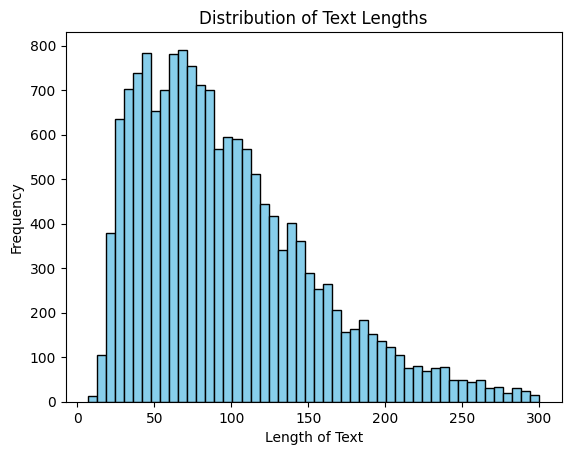

Minimum text length: 7
Maximum text length: 300


In [ ]:
import matplotlib.pyplot as plt

# Calculate the length of each text
text_lengths = [len(example['text']) for example in emotion['train']]

# Plot the distribution of text lengths
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Find min and max text length
min_length = min(text_lengths)
max_length = max(text_lengths)

print("Minimum text length:", min_length)
print("Maximum text length:", max_length)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Get English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Function to remove stopwords and tokenize text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Apply preprocessing to the 'text' field in the 'emotion' dataset
emotion['train'] = [{'text': preprocess_text(example['text']), 'label': example['label']} for example in emotion['train']]
emotion['validation'] = [{'text': preprocess_text(example['text']), 'label': example['label']} for example in emotion['validation']]
emotion['test'] = [{'text': preprocess_text(example['text']), 'label': example['label']} for example in emotion['test']]

# Print example preprocessed text
print("Example preprocessed text:")
print(emotion['train'][0]['text'])

Example preprocessed text:
['didnt', 'feel', 'humiliated']


In [ ]:
print(emotion['train'][1]['text'])
print(emotion['train'][2]['text'])
print(emotion['train'][3]['text'])
print(emotion['train'][4]['text'])

['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake']
['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong']
['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property']
['feeling', 'grouchy']


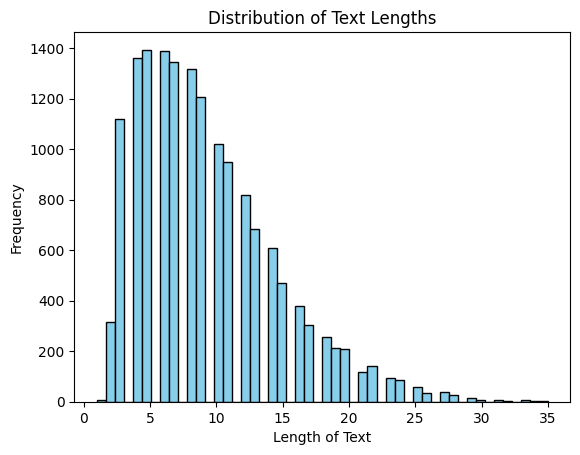

Minimum text length: 1
Maximum text length: 35


In [ ]:
# Looking at length again

# Calculate the length of each text
text_lengths = [len(example['text']) for example in emotion['train']]

# Plot the distribution of text lengths
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.show()

# Find min and max text length
min_length = min(text_lengths)
max_length = max(text_lengths)

print("Minimum text length:", min_length)
print("Maximum text length:", max_length)

As we can see, removing stopwords reduces the text length radically, which may results in loss of information. In this case, I opt to keep the stopwords in the text, as they may carry important information about the sentiment.

In [4]:
emotion = load_dataset("dair-ai/emotion")

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

train_texts = [example['text'] for example in emotion['train']]
train_labels = [example['label'] for example in emotion['train']]

val_texts = [example['text'] for example in emotion['validation']]
val_labels = [example['label'] for example in emotion['validation']]


# Initialize Tokenizer
tokenizer = Tokenizer()

# Fit tokenizer on training data
tokenizer.fit_on_texts(train_texts)

# Convert text data to sequences of integers
train_texts = tokenizer.texts_to_sequences(train_texts)
val_texts = tokenizer.texts_to_sequences(val_texts)

# Define maximum sequence length
max_seq_length = 256

train_texts = pad_sequences(train_texts, maxlen=max_seq_length, padding='post', truncating='post')
val_texts = pad_sequences(val_texts, maxlen=max_seq_length, padding='post', truncating='post')

train_texts = np.array(train_texts)
val_texts = np.array(val_texts)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)


In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Define model parameters
embedding_dim = 100
units = 64
dropout_rate = 0.2

# Batch the datasets
batch_size = 64

In [ ]:
# Build simple RNN model
model_rnn = Sequential([
    Embedding(vocab_size, output_dim=64, input_length=max_seq_length),
    SimpleRNN(units),
    Dense(6, activation='softmax')  # 6 classes for emotions
])

# Compile the model
model_rnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
print("Simple RNN Model Summary:")
model_rnn.summary()

history_rnn = model_rnn.fit(
    x=train_texts,
    y=train_labels,
    validation_data=(val_texts, val_labels),
    epochs=10
)

Simple RNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 64)           973632    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 982278 (3.75 MB)
Trainable params: 982278 (3.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 81s 158ms/step - loss: 1.5839 - accuracy: 0.3242 - val_loss: 1.5807 - val_accuracy: 0.3520
Epoch 2/10
500/500 [==============================] - 65s 129ms/step - loss: 1.5802 - accuracy: 0.3298 - val_loss

In [7]:
# Build simple RNN model
model_rnn = Sequential([
    Embedding(vocab_size, output_dim=64, input_length=max_seq_length),
    SimpleRNN(units, return_sequences=True),
    SimpleRNN(units),
    Dense(6, activation='softmax')  # 6 classes for emotions
])

# Compile the model
model_rnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
print("Simple RNN Model Summary:")
model_rnn.summary()

history_rnn_stacked = model_rnn.fit(
    x=train_texts,
    y=train_labels,
    validation_data=(val_texts, val_labels),
    epochs=10
)

Simple RNN Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 64)           973632    
                                                                 
 simple_rnn (SimpleRNN)      (None, 256, 64)           8256      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
Total params: 990534 (3.78 MB)
Trainable params: 990534 (3.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 145s 284ms/step - loss: 1.5918 - accuracy: 0.3232 - val_loss: 1.6010 - v

In [8]:
# Build LSTM model with two stacked layers
model_lstm = Sequential([
    Embedding(vocab_size, output_dim=64, input_length=max_seq_length),
    LSTM(units),
    Dense(6, activation='softmax')  # 6 classes for emotions
])

# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Print model summary
print("\nLSTM Model Summary:")
model_lstm.summary()

# Train the model
history_lstm_single = model_lstm.fit(
    x=train_texts,
    y=train_labels,
    validation_data=(val_texts, val_labels),
    epochs=10
)


LSTM Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 64)           973632    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1007046 (3.84 MB)
Trainable params: 1007046 (3.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 18s 32ms/step - loss: 1.5839 - accuracy: 0.3291 - val_loss: 1.5806 - val_accuracy: 0.3520
Epoch 2/10
500/500 [==============================] - 7s 15ms/step - loss: 1.5774 - accuracy: 0.3327 - val_loss: 1.

In [ ]:
# Build LSTM model with two stacked layers
model_lstm = Sequential([
    Embedding(vocab_size, output_dim=64, input_length=max_seq_length),
    LSTM(units, return_sequences=True),
    LSTM(units),
    Dense(6, activation='softmax')  # 6 classes for emotions
])

# Compile the model
model_lstm.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Print model summary
print("\nLSTM Model Summary:")
model_lstm.summary()

# Train the model
history_lstm = model_lstm.fit(
    x=train_texts,
    y=train_labels,
    validation_data=(val_texts, val_labels),
    epochs=10
)


LSTM Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 256, 64)           973632    
                                                                 
 lstm (LSTM)                 (None, 256, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1040070 (3.97 MB)
Trainable params: 1040070 (3.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 23s 40ms/step - loss: 1.5847 - accuracy: 0.3268 - val_loss: 1.5875 - val_

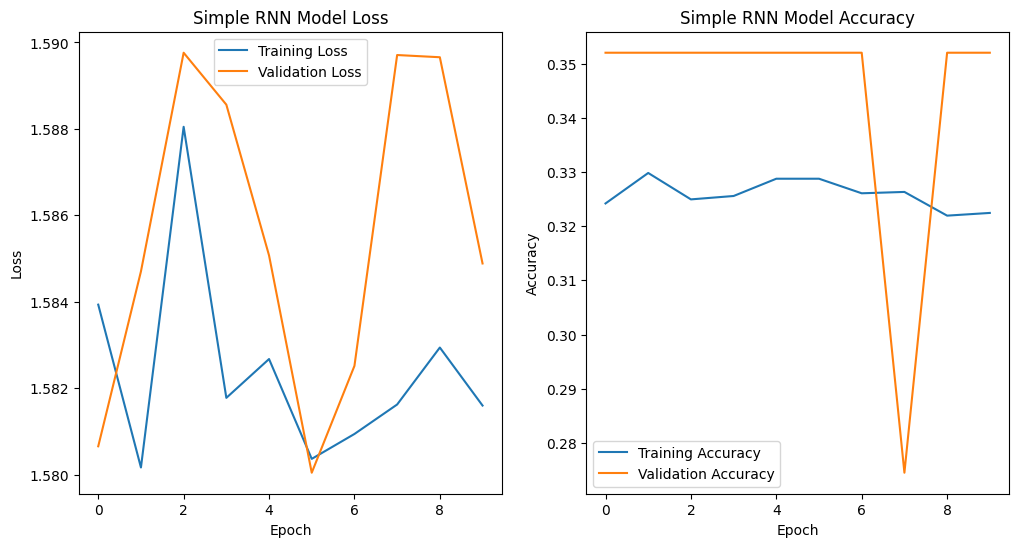

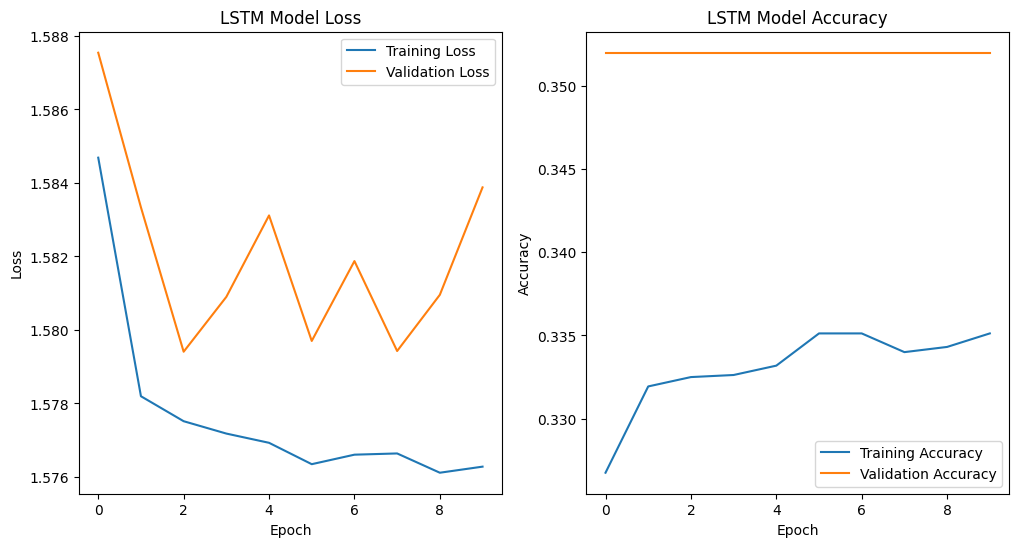

In [ ]:
# Plot training and validation loss for Simple RNN model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Simple RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for Simple RNN model
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Simple RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for LSTM model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for LSTM model
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


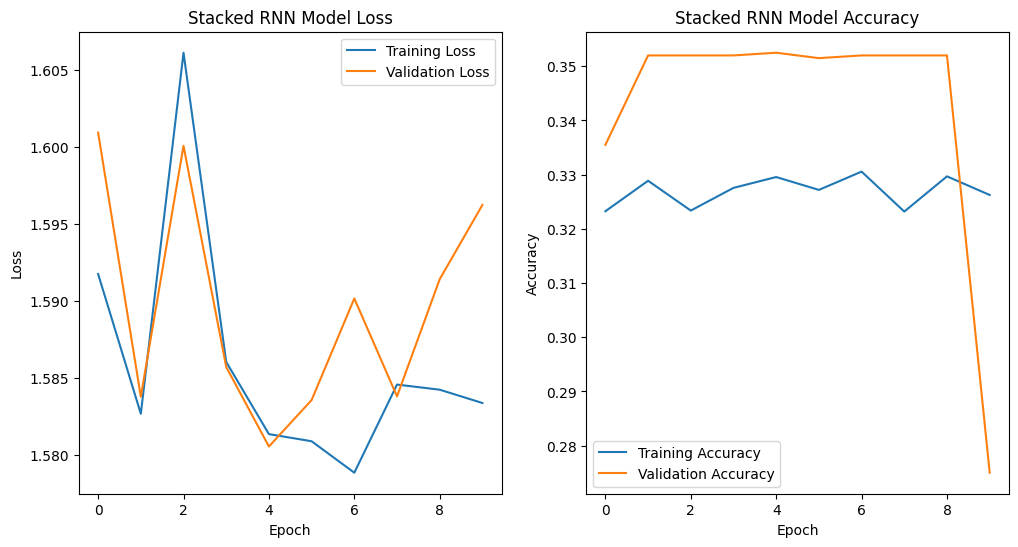

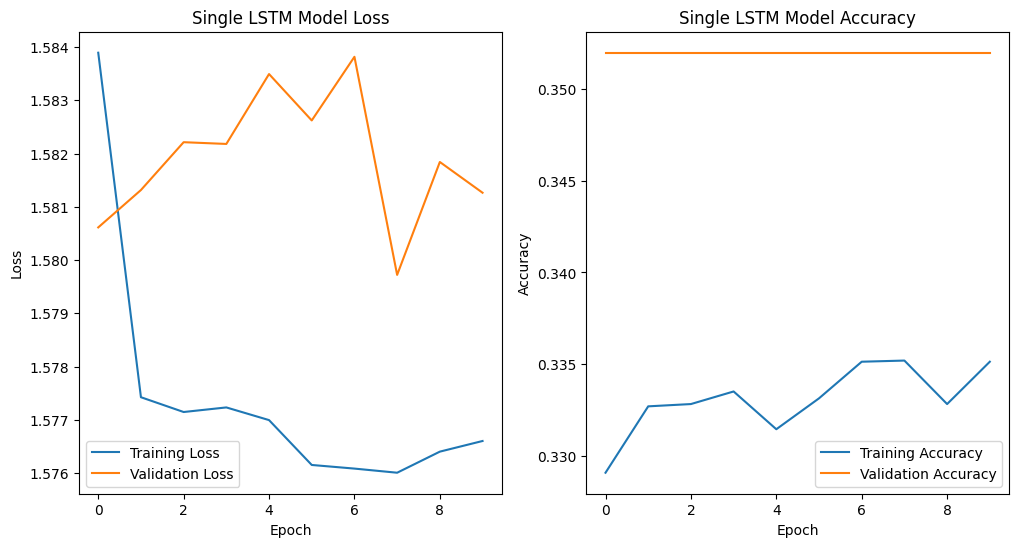

In [10]:
import matplotlib.pyplot as plt
# Plot training and validation loss for Simple RNN model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn_stacked.history['loss'], label='Training Loss')
plt.plot(history_rnn_stacked.history['val_loss'], label='Validation Loss')
plt.title('Stacked RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for Simple RNN model
plt.subplot(1, 2, 2)
plt.plot(history_rnn_stacked.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn_stacked.history['val_accuracy'], label='Validation Accuracy')
plt.title('Stacked RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss for LSTM model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_single.history['loss'], label='Training Loss')
plt.plot(history_lstm_single.history['val_loss'], label='Validation Loss')
plt.title('Single LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy for LSTM model
plt.subplot(1, 2, 2)
plt.plot(history_lstm_single.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm_single.history['val_accuracy'], label='Validation Accuracy')
plt.title('Single LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Analyzing the distribution of text lengths in the dataset, I found that the minimum text length was 7 words and the maximum was 300 words. Based on this, I chose to pad or truncate the input sequences to a length of 256, which is a suitable compromise near 128, 256, and 512. After comparing the performance of simple RNN and LSTM models with both single and stacked layers, each trained for a maximum of 10 epochs, I observed that all models performed poorly. The final validation accuracy of the single and stacked LSTM model and the simple RNN model was 0.3520, with no clear declining trend in validation losses throughout the epochs. This indicates that the models struggled to learn effectively from the texts and classify them accurately.

## Question 2 (30 points)

Now download the pretrained word embedding models from Gensim library with different embedding size 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200'. Show the most similar words for `anger, fear, joy, love, sadness, and surprise`. Use the best performing model from the Quesetion 1 and replace the embedding layer with pretrained word embeddings with different embedding size. Explain whether these pretrained embedding would imporve the model performance.


In [5]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [6]:
import gensim.downloader as api

# Download pretrained word embedding models
embedding_models = {
    'glove-twitter-25': api.load('glove-twitter-25'),
    'glove-twitter-50': api.load('glove-twitter-50'),
    'glove-twitter-100': api.load('glove-twitter-100'),
    'glove-twitter-200': api.load('glove-twitter-200')
}

# Show most similar words for each emotion
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
for embedding_size, model in embedding_models.items():
    print(f"Most similar words for {embedding_size}:")
    for emotion in emotions:
        print(f"{emotion}: {model.most_similar(emotion)}")

[==================================================] 100.0% 104.8/104.8MB downloaded
[==================================================] 100.0% 199.5/199.5MB downloaded
[==================================================] 100.0% 387.1/387.1MB downloaded
[==================================================] 100.0% 758.5/758.5MB downloaded
Most similar words for glove-twitter-25:
anger: [('fear', 0.9505937695503235), ('frustration', 0.9350658059120178), ('emotions', 0.9121993780136108), ('pain', 0.9061965346336365), ('emotion', 0.9021011590957642), ('hatred', 0.9015483856201172), ('enemy', 0.9007921814918518), ('confusion', 0.8988509178161621), ('loneliness', 0.8956931829452515), ('jealousy', 0.8939906358718872)]
fear: [('anger', 0.9505937695503235), ('enemy', 0.9229838252067566), ('afraid', 0.9117358922958374), ('destroy', 0.9105901122093201), ('fears', 0.9076415300369263), ('lies', 0.8961015343666077), ('faith', 0.8939934968948364), ('hatred', 0.8898482918739319), ('overcome', 0.888783

Training with glove-twitter-25 embeddings...
Epoch 1/10
500/500 [==============================] - 8s 9ms/step - loss: 1.4149 - accuracy: 0.4565 - val_loss: 1.2614 - val_accuracy: 0.5140
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 1.1816 - accuracy: 0.5396 - val_loss: 1.0725 - val_accuracy: 0.5860
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 1.0225 - accuracy: 0.5993 - val_loss: 0.9390 - val_accuracy: 0.6130
Epoch 4/10
500/500 [==============================] - 3s 7ms/step - loss: 0.8850 - accuracy: 0.6526 - val_loss: 0.8249 - val_accuracy: 0.6785
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.7606 - accuracy: 0.7090 - val_loss: 0.7258 - val_accuracy: 0.7040
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 0.6497 - accuracy: 0.7544 - val_loss: 0.6243 - val_accuracy: 0.7625
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 0.5548 - accuracy: 0.7937 - v

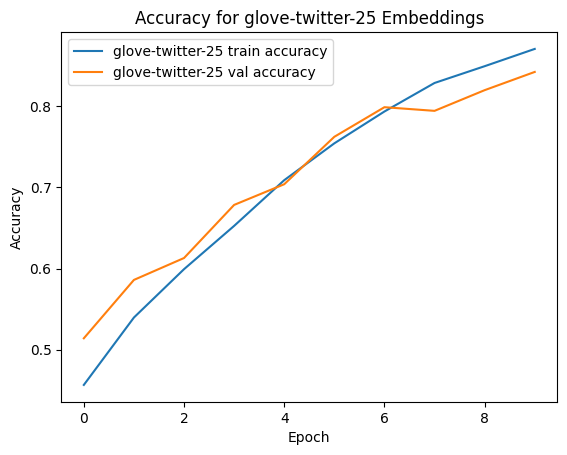

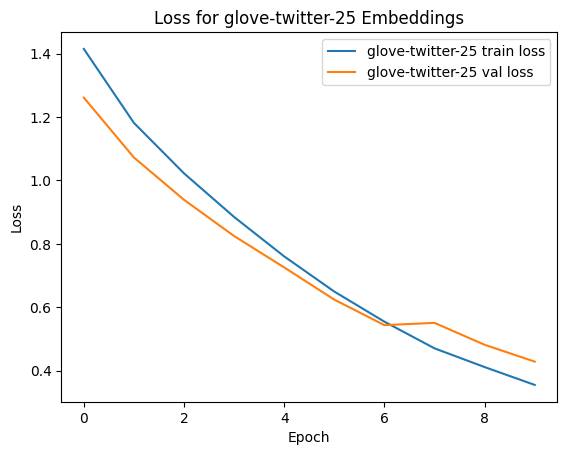

Training with glove-twitter-50 embeddings...
Epoch 1/10
500/500 [==============================] - 7s 9ms/step - loss: 1.3359 - accuracy: 0.4911 - val_loss: 1.1004 - val_accuracy: 0.5895
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.9514 - accuracy: 0.6479 - val_loss: 0.8144 - val_accuracy: 0.6850
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.7025 - accuracy: 0.7406 - val_loss: 0.6139 - val_accuracy: 0.7645
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.5315 - accuracy: 0.8043 - val_loss: 0.4745 - val_accuracy: 0.8250
Epoch 5/10
500/500 [==============================] - 4s 7ms/step - loss: 0.4150 - accuracy: 0.8476 - val_loss: 0.4307 - val_accuracy: 0.8455
Epoch 6/10
500/500 [==============================] - 3s 7ms/step - loss: 0.3368 - accuracy: 0.8770 - val_loss: 0.3738 - val_accuracy: 0.8665
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.2798 - accuracy: 0.8967 - v

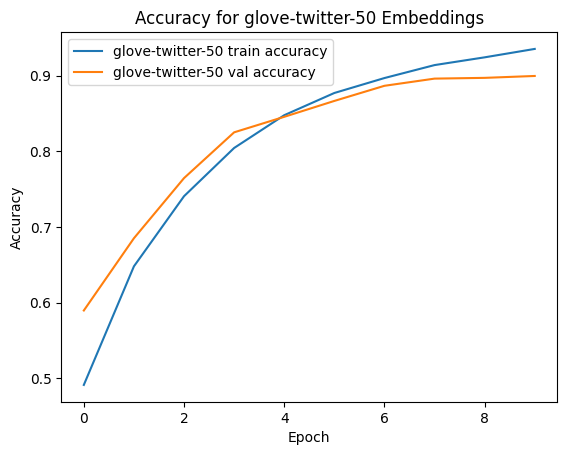

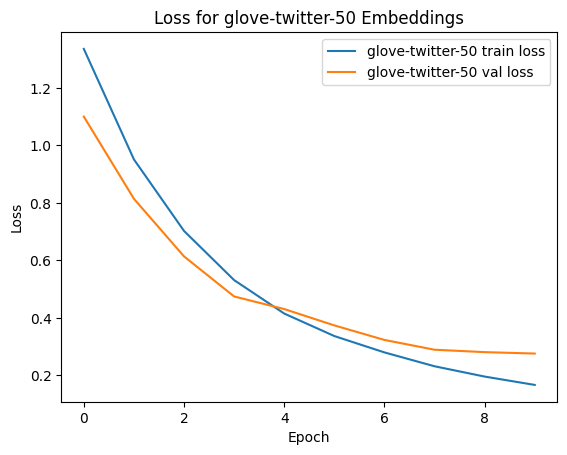

Training with glove-twitter-100 embeddings...
Epoch 1/10
500/500 [==============================] - 7s 9ms/step - loss: 1.2205 - accuracy: 0.5451 - val_loss: 0.8381 - val_accuracy: 0.6845
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.6636 - accuracy: 0.7627 - val_loss: 0.4878 - val_accuracy: 0.8345
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.4012 - accuracy: 0.8592 - val_loss: 0.3235 - val_accuracy: 0.8860
Epoch 4/10
500/500 [==============================] - 3s 7ms/step - loss: 0.2784 - accuracy: 0.8979 - val_loss: 0.2644 - val_accuracy: 0.9030
Epoch 5/10
500/500 [==============================] - 3s 7ms/step - loss: 0.2186 - accuracy: 0.9169 - val_loss: 0.3823 - val_accuracy: 0.8785
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1876 - accuracy: 0.9268 - val_loss: 0.1971 - val_accuracy: 0.9215
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1439 - accuracy: 0.9386 - 

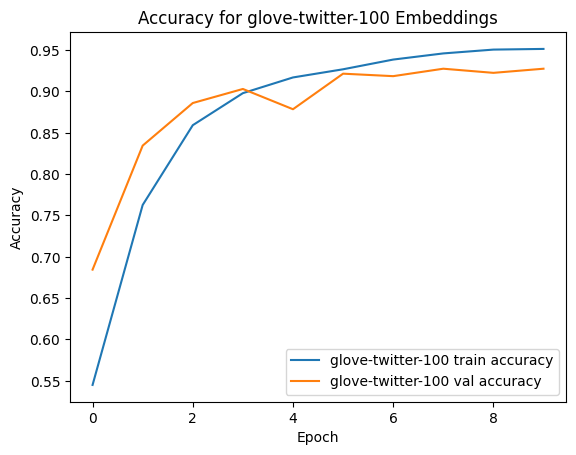

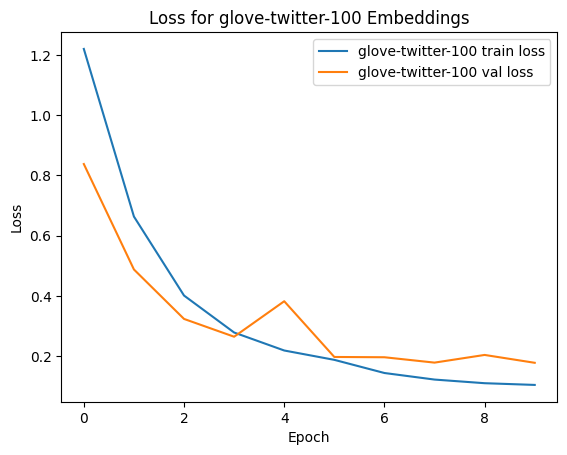

Training with glove-twitter-200 embeddings...
Epoch 1/10
500/500 [==============================] - 7s 9ms/step - loss: 1.0723 - accuracy: 0.6066 - val_loss: 0.6461 - val_accuracy: 0.7820
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.4494 - accuracy: 0.8452 - val_loss: 0.3539 - val_accuracy: 0.8815
Epoch 3/10
500/500 [==============================] - 4s 7ms/step - loss: 0.2607 - accuracy: 0.9037 - val_loss: 0.2266 - val_accuracy: 0.9150
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1821 - accuracy: 0.9291 - val_loss: 0.2057 - val_accuracy: 0.9140
Epoch 5/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1398 - accuracy: 0.9399 - val_loss: 0.1867 - val_accuracy: 0.9255
Epoch 6/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1192 - accuracy: 0.9467 - val_loss: 0.1873 - val_accuracy: 0.9220
Epoch 7/10
500/500 [==============================] - 4s 7ms/step - loss: 0.1030 - accuracy: 0.9513 - 

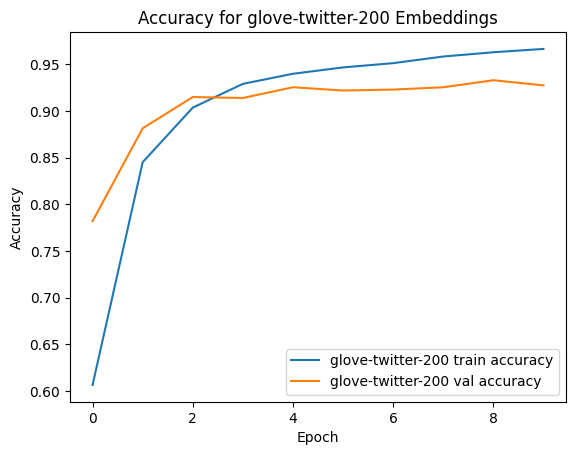

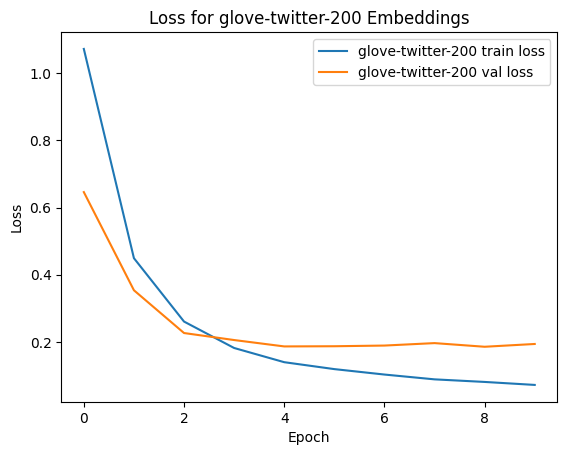

               Model  Final Train Accuracy  Final Val Accuracy  \
0   glove-twitter-25              0.870875              0.8425   
1   glove-twitter-50              0.935250              0.8995   
2  glove-twitter-100              0.951437              0.9275   
3  glove-twitter-200              0.966563              0.9275   

   Final Train Loss  Final Val Loss  
0          0.355313        0.428823  
1          0.166693        0.275839  
2          0.104271        0.177760  
3          0.072127        0.194014  


In [20]:
import gensim.downloader as api
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import pandas as pd

# Assuming `emotion` dataset is already loaded
train_texts = [example['text'] for example in emotion['train']]
train_labels = [example['label'] for example in emotion['train']]
val_texts = [example['text'] for example in emotion['validation']]
val_labels = [example['label'] for example in emotion['validation']]

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
max_seq_length = max([len(x.split()) for x in train_texts])

def create_embedding_matrix(word_index, embedding_model):
    embedding_dim = embedding_model.vector_size
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in word_index.items():
        if word in embedding_model:
            embedding_matrix[i] = embedding_model[word]
    return embedding_matrix

def build_lstm_model(embedding_matrix, embedding_dim):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_seq_length, trainable=False),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

results = []

for name, embedding_model in embedding_models.items():
    print(f"Training with {name} embeddings...")

    embedding_dim = embedding_model.vector_size
    embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_model)

    model = build_lstm_model(embedding_matrix, embedding_dim)

    train_sequences = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=max_seq_length)
    val_sequences = pad_sequences(tokenizer.texts_to_sequences(val_texts), maxlen=max_seq_length)

    history = model.fit(train_sequences, np.array(train_labels), validation_data=(val_sequences, np.array(val_labels)), epochs=10, batch_size=32)

    results.append({
        'model': name,
        'history': history.history
    })

    # Plot the results
    plt.plot(history.history['accuracy'], label=f'{name} train accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} val accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy for {name} Embeddings')
    plt.show()

    plt.plot(history.history['loss'], label=f'{name} train loss')
    plt.plot(history.history['val_loss'], label=f'{name} val loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss for {name} Embeddings')
    plt.show()

# Create summary table
summary_data = []

for result in results:
    history = result['history']
    final_train_accuracy = history['accuracy'][-1]
    final_val_accuracy = history['val_accuracy'][-1]
    final_train_loss = history['loss'][-1]
    final_val_loss = history['val_loss'][-1]

    summary_data.append({
        'Model': result['model'],
        'Final Train Accuracy': final_train_accuracy,
        'Final Val Accuracy': final_val_accuracy,
        'Final Train Loss': final_train_loss,
        'Final Val Loss': final_val_loss
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df)


Based on the results, I observed a significant improvement in model performance across all embedding sizes. As the dimensionality of the embeddings increases, there's a consistent trend of enhancement in both training and validation accuracies. This improvement can be attributed to the richer semantic information embedded in higher-dimensional embeddings, enabling the model to capture more nuanced word relationships. The increase in accuracy with larger embedding sizes is expected because they can represent more complex semantic information and capture finer-grained distinctions between words. Consequently, the model trained with the largest embedding size, glove-twitter-200, achieves the highest accuracy on both training and validation sets, indicating its superior ability to generalize and capture underlying data patterns. Overall, these results affirm the utility of pretrained embeddings in improving model performance by providing richer semantic representations of words. These models perform much better than than the models without pretrained embedding.

## Question 3 (20 points)

Now load BERT models from TensorFlow Hub. Fine-tune it with the data and evaluate the model performance. Check how you can do it [here](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)

In [ ]:
!pip install -U "tensorflow-text==2.13.*"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_text as text

train_texts = [example['text'] for example in emotion['train']]
train_labels = [example['label'] for example in emotion['train']]

val_texts = [example['text'] for example in emotion['validation']]
val_labels = [example['label'] for example in emotion['validation']]

train_texts = np.array(train_texts)
val_texts = np.array(val_texts)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

# Define the BERT model and preprocessing model URLs
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

# Load the BERT preprocessing model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

# Load the BERT model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

# Define the classifier model
def build_classifier_model():
    # Define input layer for text
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

    # Load preprocessing layer
    preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')

    # Preprocess text input and extract input_word_ids
    encoder_inputs = preprocessing_layer(text_input)
    encoder_inputs = {'input_word_ids': encoder_inputs['input_word_ids'],
                      'input_mask': encoder_inputs['input_mask'],
                      'input_type_ids': encoder_inputs['input_type_ids']}

    # Load BERT encoder layer
    encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')

    # Encode preprocessed inputs using BERT encoder
    outputs = encoder(encoder_inputs)

    # Extract pooled_output from BERT outputs
    pooled_output = outputs['pooled_output']

    # Apply dropout
    net = tf.keras.layers.Dropout(0.1)(pooled_output)

    # Define output layer with softmax activation for multi-class classification
    num_classes = 6  # Assuming 6 classes
    classifier_output = tf.keras.layers.Dense(num_classes, activation='softmax', name='classifier')(net)

    # Define the model
    model = tf.keras.Model(text_input, classifier_output)

    return model


num_classes = 6

# Build the classifier model
classifier_model = build_classifier_model()

# Compile the classifier model
optimizer = Adam(lr=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = ['accuracy']
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Display the summary of the classifier model
classifier_model.summary()

# Train the classifier model
history = classifier_model.fit(
    train_texts,
    tf.keras.utils.to_categorical(train_labels, num_classes=num_classes),
    validation_data=(val_texts, tf.keras.utils.to_categorical(val_labels, num_classes=num_classes)),
    epochs=5,
    batch_size=32
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                            

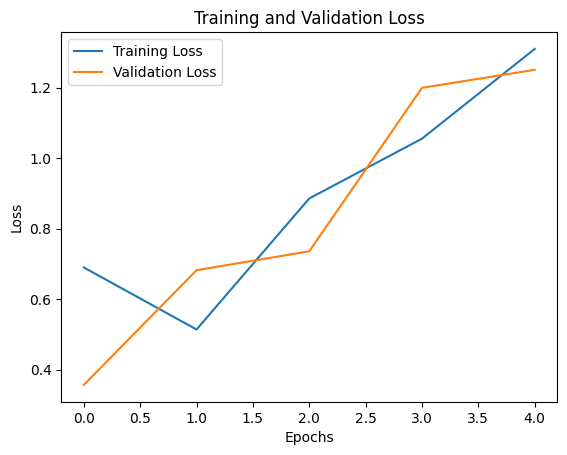

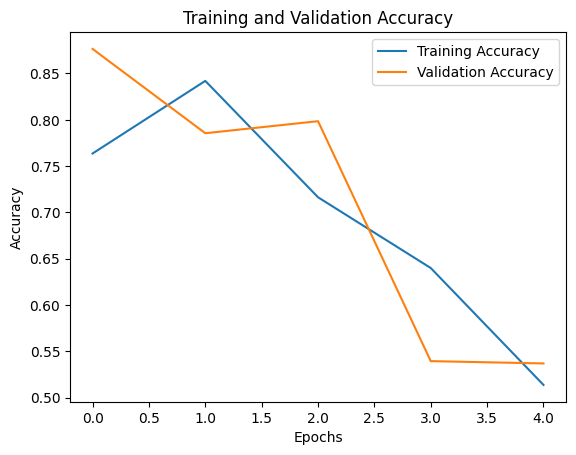

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The BERT-based classifier outperforms the LSTM-based model due to its utilization of pretrained representations, bidirectional context understanding, fine-tuning capability, and attention mechanisms. BERT's deep bidirectional Transformer architecture enables it to capture intricate semantic relationships, making it adept at understanding text data. Its ability to leverage contextual information, adapt to specific tasks through fine-tuning, and dynamically focus on relevant words enhances its performance in emotion classification and other natural language processing tasks. While it outperformed the baseline models, the gensim-models were able achieve better performance. Based on the plots, the rising loss and decreasing accuracy over the epochs indicate overfit, early stopping could improve the final accuracy.

# Question 4 (10 points)

Now let's try some state-of-the-art Large Language Models (LLM)! Cohere provides trial API for free and you may register and use the LLM. After you obtain the trial API, go to https://dashboard.cohere.com/playground/classify and see how the LLM-based classification works. You could choose several pretrained embedding models such as embed-engligh-2.0 or embed-engligh-3.0 and provide example training data. Evaluate the model performance.

In [ ]:
!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
import cohere
from cohere import ClassifyExample
import pandas as pd

In [ ]:
api_key = 'YOUR_API_KEY'
co = cohere.Client(api_key)

In [ ]:
model_name = "embed-english-v3.0"
input_type = "classification"

train_texts = [example['text'] for example in emotion['train']]
train_labels = [example['label'] for example in emotion['train']]

# Get the string representations of emotion labels
emotion_names = emotion['train'].features['label'].names

# Map numerical labels to string representations
train_labels_str = [emotion_names[label] for label in train_labels]

val_texts = [example['text'] for example in emotion['validation']]
val_labels = [example['label'] for example in emotion['validation']]

val_labels_str = [emotion_names[label] for label in val_labels]

# Initialize a list to store examples
examples = []

# Create examples from training data, limiting to 2500
for text, label_str in zip(train_texts[:2500], train_labels_str[:2500]):
    example = {'text': text, 'label': label_str}
    examples.append(example)

# Limit val_text to 96 instances
inputs = val_texts[:96]

print(examples)


[{'text': 'i didnt feel humiliated', 'label': 'sadness'}, {'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 'sadness'}, {'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 'anger'}, {'text': 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'label': 'love'}, {'text': 'i am feeling grouchy', 'label': 'anger'}, {'text': 'ive been feeling a little burdened lately wasnt sure why that was', 'label': 'sadness'}, {'text': 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'label': 'surprise'}, {'text': 'i feel as confused about life as a teenager or as jaded as a year old man', 'label': 'fear'}, {'text': 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'label': 'joy'}, {'text': 'i feel romantic too', 'label': 'love'}, {'text'

In [ ]:
emotion_names = emotion['train'].features['label'].names
print(emotion_names)

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [ ]:
print(val_labels_str[150])

joy


In [ ]:
response = co.classify(
    inputs=inputs,
    examples=examples,
    model=model_name
)
print(response)

id='02e02e00-ffc3-4aae-ab37-205f5f59a86c' classifications=[ClassifyResponseClassificationsItem(id='80999fd5-69b4-4076-9ae7-013871bd5e77', input='im feeling quite sad and sorry for myself but ill snap out of it soon', prediction='sadness', predictions=['sadness'], confidence=0.7963621, confidences=[0.7963621], labels={'anger': ClassifyResponseClassificationsItemLabelsValue(confidence=0.08803264), 'fear': ClassifyResponseClassificationsItemLabelsValue(confidence=0.04448593), 'joy': ClassifyResponseClassificationsItemLabelsValue(confidence=0.038476005), 'love': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0182873), 'sadness': ClassifyResponseClassificationsItemLabelsValue(confidence=0.7963621), 'surprise': ClassifyResponseClassificationsItemLabelsValue(confidence=0.0143560255)}, classification_type='single-label'), ClassifyResponseClassificationsItem(id='edaa5b50-d9a2-433e-833c-f2ab8ac7dfe9', input='i feel like i am still looking at a blank canvas blank pieces of paper', pr

In [ ]:
import pandas as pd

# Initialize an empty list to store classification data
data = []

# Iterate over classifications in the response and limit to the first 96
for i, classification in enumerate(response.classifications):
    if i >= 96:
        break  # Limit to the first 96 classifications
    input_text = classification.input
    predicted_label = classification.prediction
    highest_confidence = classification.confidence
    true_label = val_labels_str[i]  # Get the true label from val_labels_str
    data.append({'Input Text': input_text, 'Predicted Label': predicted_label, 'Highest Confidence': highest_confidence, 'True Label': true_label})

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df.head(10)


,Input Text,Predicted Label,Highest Confidence,True Label
0,im feeling quite sad and sorry for myself but ...,sadness,0.796362,sadness
1,i feel like i am still looking at a blank canv...,sadness,0.817315,sadness
2,i feel like a faithful servant,joy,0.463650,love
3,i am just feeling cranky and blue,anger,0.753466,anger
4,i can have for a treat or if i am feeling festive,joy,0.790866,joy
5,i start to feel more appreciative of what god ...,joy,0.734598,joy
6,i am feeling more confident that we will be ab...,joy,0.838292,joy
7,i feel incredibly lucky just to be able to tal...,joy,0.607661,joy
8,i feel less keen about the army every day,sadness,0.613095,joy
9,i feel dirty and ashamed for saying that,sadness,0.669548,sadness


In [ ]:
# Initialize an empty list to store all classification data
all_data = []

# Loop over the validation data in chunks of 96 instances
for i in range(0, len(val_texts), 96):
    # Get the current chunk of validation texts and labels
    chunk_texts = val_texts[i:i+96]
    chunk_labels_str = val_labels_str[i:i+96]

    # Create examples
    examples = examples

    # Classify the current chunk
    response = co.classify(inputs=chunk_texts, examples=examples, model=model_name)

    # Iterate over classifications in the response
    for classification, true_label in zip(response.classifications, chunk_labels_str):
        input_text = classification.input
        predicted_label = classification.prediction
        highest_confidence = classification.confidence
        # Append the classification data for the current instance to the list of all data
        all_data.append({'Input Text': input_text, 'Predicted Label': predicted_label, 'Highest Confidence': highest_confidence, 'True Label': true_label})

# Create DataFrame from all classification data
df = pd.DataFrame(all_data)

# Display DataFrame
df.head(10)


,Input Text,Predicted Label,Highest Confidence,True Label
0,im feeling quite sad and sorry for myself but ...,sadness,0.796362,sadness
1,i feel like i am still looking at a blank canv...,sadness,0.817315,sadness
2,i feel like a faithful servant,joy,0.463650,love
3,i am just feeling cranky and blue,anger,0.753466,anger
4,i can have for a treat or if i am feeling festive,joy,0.790866,joy
5,i start to feel more appreciative of what god ...,joy,0.734598,joy
6,i am feeling more confident that we will be ab...,joy,0.838292,joy
7,i feel incredibly lucky just to be able to tal...,joy,0.607661,joy
8,i feel less keen about the army every day,sadness,0.613095,joy
9,i feel dirty and ashamed for saying that,sadness,0.669548,sadness


In [ ]:
# Count the number of rows where the predicted and true labels match
matching_rows = df[df['Predicted Label'] == df['True Label']]

# Calculate the percentage
percentage_matching = len(matching_rows) / len(df) * 100

print(f"Percentage of rows where predicted and true labels match: {percentage_matching:.2f}%")

Percentage of rows where predicted and true labels match: 68.60%


The cohere model, a state of the art LLM, was able to outperform the baseline models, and it was able to correctly identify the correct emotion in 68.6%. However, both the gemini and bert models are able to outperform this.